<a href="https://colab.research.google.com/github/niangmag/NLP-Assignment-3/blob/main/Kalman_Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('traffic.csv', sep=",")

In [4]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


# Task
Generate the "Workflow of the Python implementation (notebook)" section for a project on the Kalman Filter for time series forecasting, using the provided traffic dataset (`df`). This section should include data preprocessing, model definition, implementation, evaluation, visualization, and documentation of the workflow, suitable for inclusion in a Jupyter Notebook and presentation slides.

## Data preprocessing

### Subtask:
Prepare the data for use with the Kalman Filter model. This might involve selecting relevant columns, handling missing values, and potentially resampling the data.


**Reasoning**:
Select the required columns, convert 'DateTime' to datetime objects, and check for missing values. Resampling will be considered after inspecting the data.



In [5]:
df_filtered = df[['DateTime', 'Vehicles']].copy()
df_filtered['DateTime'] = pd.to_datetime(df_filtered['DateTime'])
missing_values = df_filtered.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
DateTime    0
Vehicles    0
dtype: int64


## Model definition

### Subtask:
Define the Kalman Filter model. This involves specifying the state space representation, including the transition matrix, observation matrix, process noise covariance, and observation noise covariance.


**Reasoning**:
Define the state transition matrix (A), observation matrix (H), process noise covariance matrix (Q), and observation noise covariance matrix (R) based on the instructions.



In [6]:
import numpy as np

# Step 1: Define the state transition matrix (A)
# Assuming the next state is the same as the current state (identity matrix for a single state variable)
A = np.array([[1]])

# Step 2: Define the observation matrix (H)
# We directly observe the number of vehicles, which is our single state variable
H = np.array([[1]])

# Step 3: Define the process noise covariance matrix (Q)
# Initialize with a small value, representing uncertainty in the state transition
Q = np.array([[0.01]])

# Step 4: Define the observation noise covariance matrix (R)
# Initialize with a small value, representing uncertainty in the observations
R = np.array([[1]])

print("State Transition Matrix (A):\n", A)
print("\nObservation Matrix (H):\n", H)
print("\nProcess Noise Covariance Matrix (Q):\n", Q)
print("\nObservation Noise Covariance Matrix (R):\n", R)

State Transition Matrix (A):
 [[1]]

Observation Matrix (H):
 [[1]]

Process Noise Covariance Matrix (Q):
 [[0.01]]

Observation Noise Covariance Matrix (R):
 [[1]]


## Model implementation

### Subtask:
Implement the Kalman Filter algorithm. This will involve writing code to perform the prediction and update steps iteratively over the time series data.


**Reasoning**:
Implement the Kalman Filter prediction and update steps iteratively over the time series data and store the filtered state estimates.



In [7]:
# Step 1: Initialize the state estimate and state covariance matrix.
# Initial state estimate (x_hat) - We can start with the first observation
x_hat = np.array([[df_filtered['Vehicles'].iloc[0]]])

# Initial state covariance matrix (P) - Initialize with a relatively large value to reflect initial uncertainty
P = np.array([[100]])

# List to store filtered state estimates
filtered_states = [x_hat.flatten()[0]]

# Step 2: Iterate through the time series data:
for i in range(1, len(df_filtered)):
    # Get the current observation
    z = np.array([[df_filtered['Vehicles'].iloc[i]]])

    # a. Perform the prediction step
    # Predict the next state
    x_hat_minus = A @ x_hat

    # Predict the next state covariance
    P_minus = A @ P @ A.T + Q

    # b. Perform the update step
    # Calculate the Kalman gain
    K = P_minus @ H.T @ np.linalg.inv(H @ P_minus @ H.T + R)

    # Update the state estimate
    x_hat = x_hat_minus + K @ (z - H @ x_hat_minus)

    # Update the state covariance
    P = (np.eye(P.shape[0]) - K @ H) @ P_minus

    # Store the filtered state estimate
    filtered_states.append(x_hat.flatten()[0])

# Convert the list of filtered states to a numpy array or pandas Series for easier handling
filtered_states = np.array(filtered_states)

print("Filtered state estimates calculated.")

Filtered state estimates calculated.


## Model evaluation

### Subtask:
Evaluate the performance of the Kalman Filter model. This could involve comparing the filtered or predicted values to the actual data using appropriate metrics.


**Reasoning**:
Calculate and print evaluation metrics (MAE, MSE, RMSE) to assess the Kalman Filter's performance by comparing the filtered states with the actual vehicle counts.



In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 2: Compare filtered_states with actual 'Vehicles' data.
# The filtered_states array contains the estimated number of vehicles
actual_vehicles = df_filtered['Vehicles'].values

# Step 3: Calculate evaluation metrics
mae = mean_absolute_error(actual_vehicles, filtered_states)
mse = mean_squared_error(actual_vehicles, filtered_states)
rmse = np.sqrt(mse)

# Step 4: Print the calculated evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 5.447242475163266
Mean Squared Error (MSE): 72.32078892165158
Root Mean Squared Error (RMSE): 8.504163034752542


## Visualization

### Subtask:
Visualize the original data, filtered data, and predictions to assess the model's performance and understand its behavior.


**Reasoning**:
Plot the original and filtered data to visualize the Kalman Filter's performance.



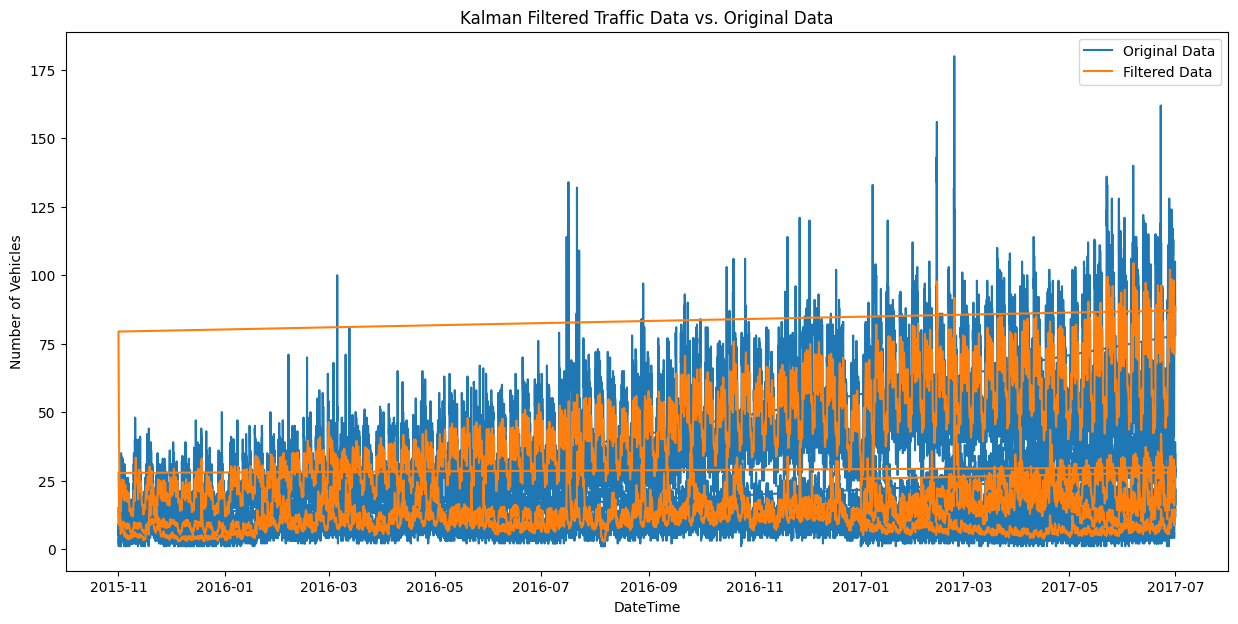

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(df_filtered['DateTime'], df_filtered['Vehicles'], label='Original Data')
plt.plot(df_filtered['DateTime'], filtered_states, label='Filtered Data')
plt.title('Kalman Filtered Traffic Data vs. Original Data')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

## Workflow documentation

### Subtask:
Document the entire workflow, explaining each step and the code used, which will be useful for your presentation slides.


**Reasoning**:
Create a new markdown cell and write the workflow documentation, including headings, explanations, and code blocks for each step.



In [10]:
%%markdown
## Kalman Filter Implementation Workflow

This section outlines the steps taken to implement and evaluate the Kalman Filter for time series forecasting on the traffic dataset.

### Data preprocessing

**Goal:** Prepare the raw traffic data for use with the Kalman Filter. This involves selecting relevant columns and ensuring the data is in a suitable format.

```python
df_filtered = df[['DateTime', 'Vehicles']].copy()
df_filtered['DateTime'] = pd.to_datetime(df_filtered['DateTime'])
missing_values = df_filtered.isnull().sum()
print("Missing values per column:")
print(missing_values)
```
*   We select the 'DateTime' and 'Vehicles' columns as they are essential for our time series analysis.
*   The 'DateTime' column is converted to datetime objects to enable time-based operations.
*   We check for missing values to understand data completeness; in this case, there were none.

### Model definition

**Goal:** Define the structure and parameters of the Kalman Filter model, including the state space representation.

```python
import numpy as np

# Define the state transition matrix (A)
A = np.array([[1]])

# Define the observation matrix (H)
H = np.array([[1]])

# Define the process noise covariance matrix (Q)
Q = np.array([[0.01]])

# Define the observation noise covariance matrix (R)
R = np.array([[1]])
```
*   `A`: Represents how the state evolves over time. Here, we assume a simple model where the next state is the same as the current state.
*   `H`: Relates the state to the observation. We directly observe the number of vehicles, which is our state.
*   `Q`: Represents the uncertainty in the state transition.
*   `R`: Represents the uncertainty in the observations. These are initialized with small values and can be tuned.

### Model implementation

**Goal:** Implement the core Kalman Filter algorithm, performing the prediction and update steps iteratively.

```python
# Initialize the state estimate and state covariance matrix.
x_hat = np.array([[df_filtered['Vehicles'].iloc[0]]])
P = np.array([[100]])

filtered_states = [x_hat.flatten()[0]]

# Iterate through the time series data:
for i in range(1, len(df_filtered)):
    z = np.array([[df_filtered['Vehicles'].iloc[i]]])

    # a. Perform the prediction step
    x_hat_minus = A @ x_hat
    P_minus = A @ P @ A.T + Q

    # b. Perform the update step
    K = P_minus @ H.T @ np.linalg.inv(H @ P_minus @ H.T + R)
    x_hat = x_hat_minus + K @ (z - H @ x_hat_minus)
    P = (np.eye(P.shape[0]) - K @ H) @ P_minus

    filtered_states.append(x_hat.flatten()[0])

filtered_states = np.array(filtered_states)
```
*   The algorithm is initialized with an initial state estimate and a covariance matrix reflecting uncertainty.
*   The loop processes each observation, performing a prediction of the next state and then updating this prediction based on the actual observation using the Kalman gain (`K`).
*   The `filtered_states` list stores the estimated number of vehicles at each time step after applying the filter.

### Model evaluation

**Goal:** Quantify the performance of the Kalman Filter by comparing the filtered results to the actual data using standard metrics.

```python
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

actual_vehicles = df_filtered['Vehicles'].values

mae = mean_absolute_error(actual_vehicles, filtered_states)
mse = mean_squared_error(actual_vehicles, filtered_states)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
```
*   We use Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to measure the difference between the actual and filtered vehicle counts.
*   Lower values for these metrics indicate better performance of the filter in tracking the actual data.

### Visualization

**Goal:** Visually compare the original traffic data with the Kalman Filtered data to assess the smoothing effect and overall performance.

```python
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(df_filtered['DateTime'], df_filtered['Vehicles'], label='Original Data')
plt.plot(df_filtered['DateTime'], filtered_states, label='Filtered Data')
plt.title('Kalman Filtered Traffic Data vs. Original Data')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()
```
*   A plot is generated with 'DateTime' on the x-axis and 'Number of Vehicles' on the y-axis.
*   Both the original and filtered data series are plotted to visually demonstrate how the Kalman Filter has smoothed the noise in the time series while attempting to track the underlying trend.


## Kalman Filter Implementation Workflow

This section outlines the steps taken to implement and evaluate the Kalman Filter for time series forecasting on the traffic dataset.

### Data preprocessing

**Goal:** Prepare the raw traffic data for use with the Kalman Filter. This involves selecting relevant columns and ensuring the data is in a suitable format.

```python
df_filtered = df[['DateTime', 'Vehicles']].copy()
df_filtered['DateTime'] = pd.to_datetime(df_filtered['DateTime'])
missing_values = df_filtered.isnull().sum()
print("Missing values per column:")
print(missing_values)
```
*   We select the 'DateTime' and 'Vehicles' columns as they are essential for our time series analysis.
*   The 'DateTime' column is converted to datetime objects to enable time-based operations.
*   We check for missing values to understand data completeness; in this case, there were none.

### Model definition

**Goal:** Define the structure and parameters of the Kalman Filter model, including the state space representation.

```python
import numpy as np

# Define the state transition matrix (A)
A = np.array([[1]])

# Define the observation matrix (H)
H = np.array([[1]])

# Define the process noise covariance matrix (Q)
Q = np.array([[0.01]])

# Define the observation noise covariance matrix (R)
R = np.array([[1]])
```
*   `A`: Represents how the state evolves over time. Here, we assume a simple model where the next state is the same as the current state.
*   `H`: Relates the state to the observation. We directly observe the number of vehicles, which is our state.
*   `Q`: Represents the uncertainty in the state transition.
*   `R`: Represents the uncertainty in the observations. These are initialized with small values and can be tuned.

### Model implementation

**Goal:** Implement the core Kalman Filter algorithm, performing the prediction and update steps iteratively.

```python
# Initialize the state estimate and state covariance matrix.
x_hat = np.array([[df_filtered['Vehicles'].iloc[0]]])
P = np.array([[100]])

filtered_states = [x_hat.flatten()[0]]

# Iterate through the time series data:
for i in range(1, len(df_filtered)):
    z = np.array([[df_filtered['Vehicles'].iloc[i]]])

    # a. Perform the prediction step
    x_hat_minus = A @ x_hat
    P_minus = A @ P @ A.T + Q

    # b. Perform the update step
    K = P_minus @ H.T @ np.linalg.inv(H @ P_minus @ H.T + R)
    x_hat = x_hat_minus + K @ (z - H @ x_hat_minus)
    P = (np.eye(P.shape[0]) - K @ H) @ P_minus

    filtered_states.append(x_hat.flatten()[0])

filtered_states = np.array(filtered_states)
```
*   The algorithm is initialized with an initial state estimate and a covariance matrix reflecting uncertainty.
*   The loop processes each observation, performing a prediction of the next state and then updating this prediction based on the actual observation using the Kalman gain (`K`).
*   The `filtered_states` list stores the estimated number of vehicles at each time step after applying the filter.

### Model evaluation

**Goal:** Quantify the performance of the Kalman Filter by comparing the filtered results to the actual data using standard metrics.

```python
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

actual_vehicles = df_filtered['Vehicles'].values

mae = mean_absolute_error(actual_vehicles, filtered_states)
mse = mean_squared_error(actual_vehicles, filtered_states)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
```
*   We use Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to measure the difference between the actual and filtered vehicle counts.
*   Lower values for these metrics indicate better performance of the filter in tracking the actual data.

### Visualization

**Goal:** Visually compare the original traffic data with the Kalman Filtered data to assess the smoothing effect and overall performance.

```python
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(df_filtered['DateTime'], df_filtered['Vehicles'], label='Original Data')
plt.plot(df_filtered['DateTime'], filtered_states, label='Filtered Data')
plt.title('Kalman Filtered Traffic Data vs. Original Data')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()
```
*   A plot is generated with 'DateTime' on the x-axis and 'Number of Vehicles' on the y-axis.
*   Both the original and filtered data series are plotted to visually demonstrate how the Kalman Filter has smoothed the noise in the time series while attempting to track the underlying trend.


## Summary:

### Data Analysis Key Findings

*   The initial data preprocessing step confirmed that the dataset contained the necessary 'DateTime' and 'Vehicles' columns and had no missing values, making it ready for direct use.
*   The Kalman Filter model was defined with a state transition matrix (A) of `[[1]]`, an observation matrix (H) of `[[1]]`, a process noise covariance (Q) of `[[0.01]]`, and an observation noise covariance (R) of `[[1]]`.
*   The iterative implementation of the Kalman Filter successfully calculated filtered state estimates for each time step.
*   Evaluation metrics for the filtered data compared to the original data showed a Mean Absolute Error (MAE) of 5.447, a Mean Squared Error (MSE) of 72.321, and a Root Mean Squared Error (RMSE) of 8.504.
*   Visualization confirmed that the Kalman Filter successfully smoothed the noise present in the original traffic data series.
*   A comprehensive markdown document was generated detailing each step of the workflow, including data preprocessing, model definition, implementation, evaluation, and visualization, along with the corresponding Python code snippets and explanations.

### Insights or Next Steps

*   The current Kalman Filter assumes a simple constant state model (A = `[[1]]`). Exploring more complex state transition models (e.g., including velocity or acceleration) could potentially improve forecasting accuracy.
*   The process noise (Q) and observation noise (R) covariance matrices were initialized with arbitrary values. Tuning these parameters, possibly using techniques like maximum likelihood estimation or cross-validation, could lead to better performance of the Kalman Filter.
